# ドルコスト平均法のデモ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf
import pandas_ta as ta
from datetime import date, datetime, timedelta
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# 基本設定
# 代表的ETF: 上場インデックスファンドTOPIX(1308), iFreeETF 日経225(1320)
# 代表的ETF: 上場インデックスファンド米国債券(1486), iFreeETF 東証REIT(1488)
# 代表的ETF: NextFunds NYダウ(1546), NextFundsインド株(1678)
ticker = '1308.T'
start_date = '2017-01-01'
end_date = '2024-10-01'
interval = '1ME'
amount = 30000
# 株価データのダウンロード
data = yf.download(ticker, start=start_date, end=end_date)
data = data.dropna()
# リサンプリング
resampled_data = data.resample(interval).first()

[*********************100%%**********************]  1 of 1 completed


In [4]:
resampled_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-31,1557.0,1580.0,1557.0,1578.0,1342.894653,526100
2017-02-28,1536.0,1553.0,1531.0,1553.0,1321.619507,221200
2017-03-31,1567.0,1579.0,1563.0,1577.0,1342.043701,125900
2017-04-30,1559.0,1562.0,1550.0,1556.0,1324.172363,331200
2017-05-31,1573.0,1580.0,1569.0,1580.0,1344.596680,148200


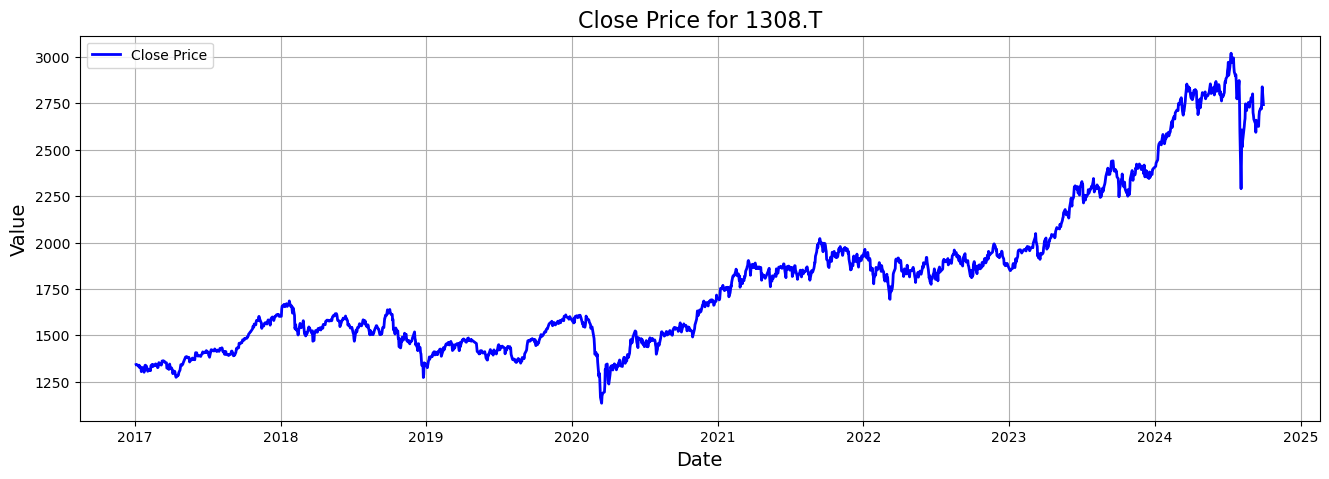

In [5]:
# 原資産の終値の図示
plt.figure(figsize=(16,5))
plt.plot(data['Adj Close'], color='b', linewidth=2, label='Close Price')
plt.title(f'Close Price for {ticker}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# ドルコスト平均法の計算
total_investment = 0
total_shares = 0
dca_log = []
for date, row in resampled_data.iterrows():
    price = row['Adj Close']
    total_shares += amount / price
    total_investment += amount
    dca_log.append({
        'Date': date,
        'Price': price,
        'Total Shares': total_shares,
        'Total Investment': total_investment,
        'Portfolio Value': total_shares * price
    })
dca_df = pd.DataFrame(dca_log)

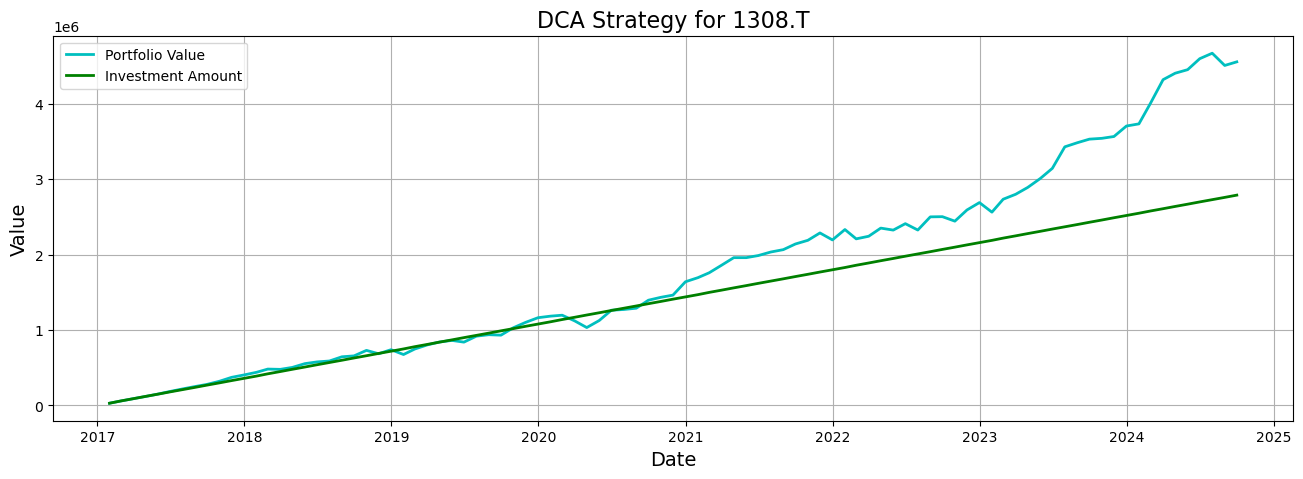

In [7]:
# 累積投資額とポートフォリオ価値の図示
plt.figure(figsize=(16,5))
plt.plot(dca_df['Date'], dca_df['Portfolio Value'], color='c', linewidth=2, label='Portfolio Value')
plt.plot(dca_df['Date'], dca_df['Total Investment'], color='g', linewidth=2, label='Investment Amount')
plt.title(f'DCA Strategy for {ticker}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [8]:
dca_df['pct_profit'] = (dca_df['Portfolio Value']-dca_df['Total Investment'])/dca_df['Total Investment']
annual_profit = dca_df[dca_df['Date'].dt.month == 1]
annual_profit.loc[:,'pct_profit'] = annual_profit['pct_profit'].apply(lambda x: '{:.2%}'.format(x))
annual_profit

,Date,Price,Total Shares,Total Investment,Portfolio Value,pct_profit
0,2017-01-31,1342.894653,22.339802,30000,3.000000e+04,0.00%
12,2018-01-31,1602.358887,274.627185,390000,4.400513e+05,12.83%
24,2019-01-31,1325.652588,509.880958,750000,6.759250e+05,-9.88%
36,2020-01-31,1566.981934,756.216815,1110000,1.184978e+06,6.75%
48,2021-01-31,1694.043701,1000.746783,1470000,1.695309e+06,15.33%
60,2022-01-31,1954.141113,1194.198024,1830000,2.333631e+06,27.52%
72,2023-01-31,1849.005371,1386.779468,2190000,2.564163e+06,17.09%
84,2024-01-31,2410.635010,1549.446320,2550000,3.735150e+06,46.48%
